<a href="https://colab.research.google.com/github/HRKagdi/Image-Classifier/blob/main/DLprac3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ls

drive/  sample_data/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
                                                                                                   
from numpy import loadtxt
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
import os

In [ ]:
os.mkdir('/content/Dataset')

In [ ]:
os.mkdir('/content/Dataset1')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Dataset')                                       

In [ ]:
os.mkdir('/content/Dataset/train/people') 

In [ ]:
import shutil
import os

source1 = '/content/Dataset/train/male/'
dest1 = '/content/Dataset/train/people'
source2='/content/Dataset/train/female/'

files1 = os.listdir(source1)
files2 = os.listdir(source2)
for f in files1:
    shutil.move(source1+f, dest1)
for f in files2:
  shutil.move(source2+f,dest1)

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/test1.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Dataset1')

In [ ]:
os.mkdir('/content/Dataset/train/nonpeople')

In [ ]:
import os
count=0
filename=os.listdir('/content/Dataset1/test1')
for f in filename: 
        dst = 'neg' + str(f) 
        src = str(f)
        str1="/content/Dataset1/test1/"
        os.rename(str1+src,str1+dst)

In [ ]:
import shutil
import os

source1 = '/content/Dataset1/test1/'
dest1 = '/content/Dataset/train/nonpeople'

files1 = os.listdir(source1)
for f in files1:
    shutil.move(source1+f, dest1)

In [ ]:
os.rmdir("/content/Dataset/train/male")

In [ ]:
os.rmdir("/content/Dataset/train/female")

In [ ]:
source1 = '/content/Dataset/train/people/'

count=0
files1 = os.listdir(source1)
for f in files1:
    count+=1
    if count>1000:
      os.remove(source1+f)

In [ ]:
source1 = '/content/Dataset/train/nonpeople/'

count=0
files1 = os.listdir(source1)
for f in files1:
    count+=1
    if count>1000:
      os.remove(source1+f)

In [ ]:
base_dir = '/content/Dataset/'

train_dir = os.path.join(base_dir, 'train')

train_people_dir = os.path.join(train_dir, 'people')
train_nonpeople_dir = os.path.join(train_dir, 'nonpeople')

In [ ]:
train_people_fnames = os.listdir( train_people_dir )
train_nonpeople_fnames = os.listdir( train_nonpeople_dir )

print(train_people_fnames[:15])
print(train_nonpeople_fnames[:15])

['049548.jpg', '058433.jpg', '075333.jpg', '075863.jpg', '056701.jpg', '032809.jpg', '025377.jpg', '051130.jpg', '055579.jpg', '035735.jpg', '036830.jpg', '038867.jpg', '011622.jpg', '027796.jpg', '001786.jpg']
['neg600.jpg', 'neg11076.jpg', 'neg10970.jpg', 'neg10466.jpg', 'neg11842.jpg', 'neg2020.jpg', 'neg9139.jpg', 'neg10509.jpg', 'neg6517.jpg', 'neg4350.jpg', 'neg9760.jpg', 'neg166.jpg', 'neg6820.jpg', 'neg5559.jpg', 'neg12448.jpg']


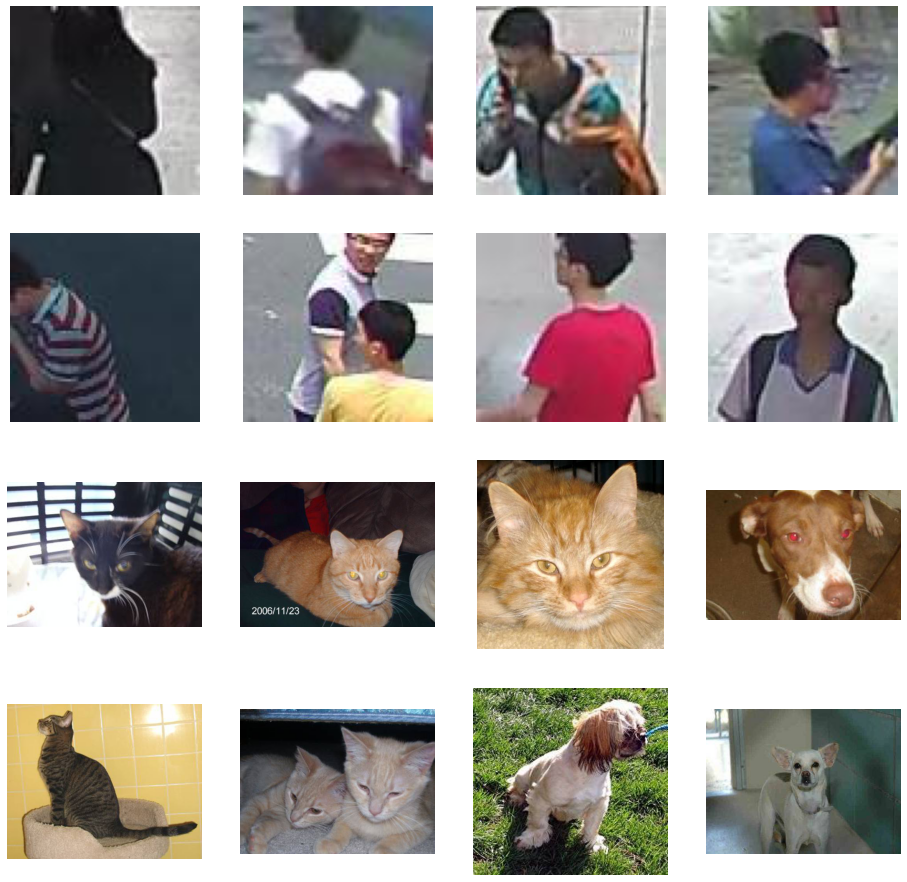

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_people_dir, fname) 
                for fname in train_people_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_nonpeople_dir, fname) 
                for fname in train_nonpeople_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):

  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(150, 150)) 

Found 2000 images belonging to 2 classes.


In [ ]:
input_shape=(128,128,2)

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Conv2D(12, kernel_size=(5,5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))




#model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [ ]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])                     

In [ ]:
history = model.fit(train_generator,
                              steps_per_epoch=50,
                              epochs=15,
                              verbose=2)

Epoch 1/15
50/50 - 4s - loss: 2.4693 - accuracy: 0.6458
Epoch 2/15
50/50 - 4s - loss: 0.5804 - accuracy: 0.7986
Epoch 3/15
50/50 - 4s - loss: 0.3759 - accuracy: 0.8600
Epoch 4/15
50/50 - 4s - loss: 0.3236 - accuracy: 0.8763
Epoch 5/15
50/50 - 4s - loss: 0.2806 - accuracy: 0.9066
Epoch 6/15
50/50 - 4s - loss: 0.2694 - accuracy: 0.9513
Epoch 7/15
50/50 - 4s - loss: 0.2205 - accuracy: 0.9577
Epoch 8/15
50/50 - 4s - loss: 0.2336 - accuracy: 0.9609
Epoch 9/15
50/50 - 4s - loss: 0.1718 - accuracy: 0.9508
Epoch 10/15
50/50 - 4s - loss: 0.1046 - accuracy: 0.9615
Epoch 11/15
50/50 - 4s - loss: 0.2431 - accuracy: 0.9628
Epoch 12/15
50/50 - 4s - loss: 0.1396 - accuracy: 0.9684
Epoch 13/15
50/50 - 4s - loss: 0.0872 - accuracy: 0.9741
Epoch 14/15
50/50 - 4s - loss: 0.1401 - accuracy: 0.9590
Epoch 15/15
50/50 - 4s - loss: 0.0900 - accuracy: 0.9779


In [ ]:
model.summary()                                                                                 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 124, 124, 6)       306       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 12)        1812      
_________________________________________________________________
dense_2 (Dense)              (None, 58, 58, 50)        650       
_________________________________________________________________
dense_3 (Dense)              (None, 58, 58, 10)        510       
Total params: 3,278
Trainable params: 3,278
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes)
  
  if classes[0]>0:
    print(fn + " is a person")
    
  else:
    print(fn + " is a not a person") 

Saving fimg.png to fimg (3).png
[[0.]]
fimg.png is a not a person


In [ ]:
import tkinter as tk
from tkinter import ttk
from tkinter import *

In [ ]:
def btn1(file):
  img=load_img(file,target_size=(150,150))
  img=img_to_array(img)
  img=img.reshape(1,150,150,3)
  img=img.astype('float32')
  img=img/255.0
  return img
  print('clicked')

def btn2(file):
  img=btn1('image1.png')
  model=load_model('history.h5')
  result=model.predict_classes(img)
  print(result[0])
  print('clicked')